Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  0 non-null      datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB
None


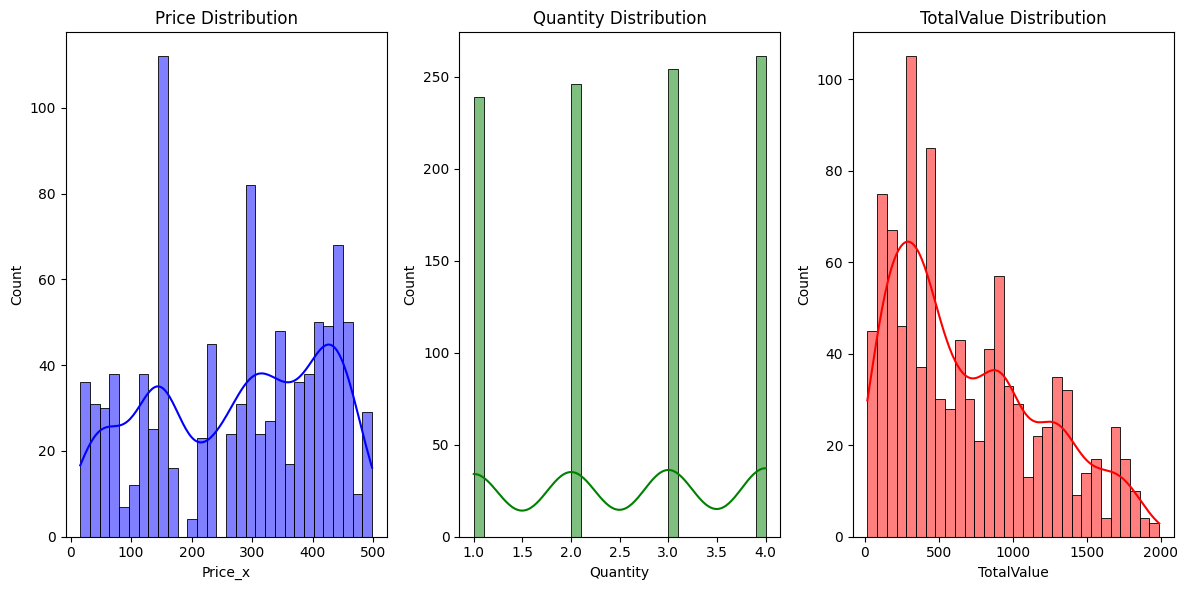

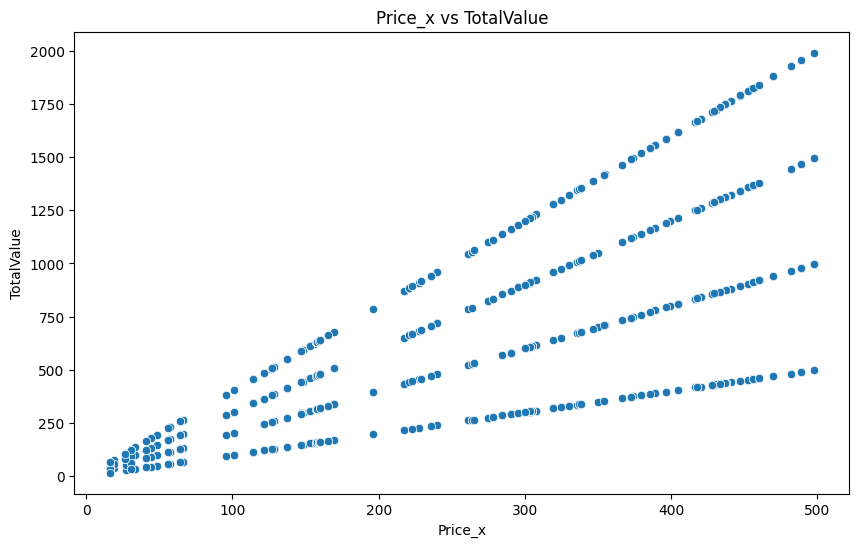

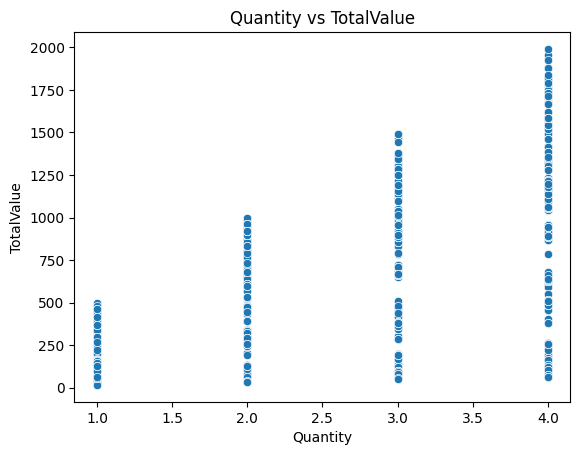

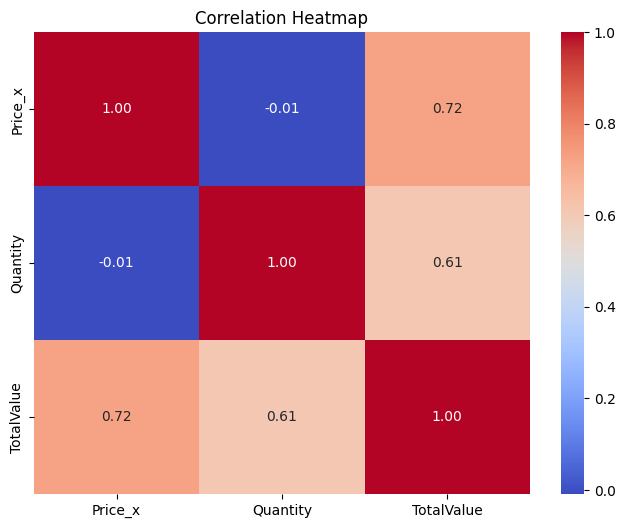

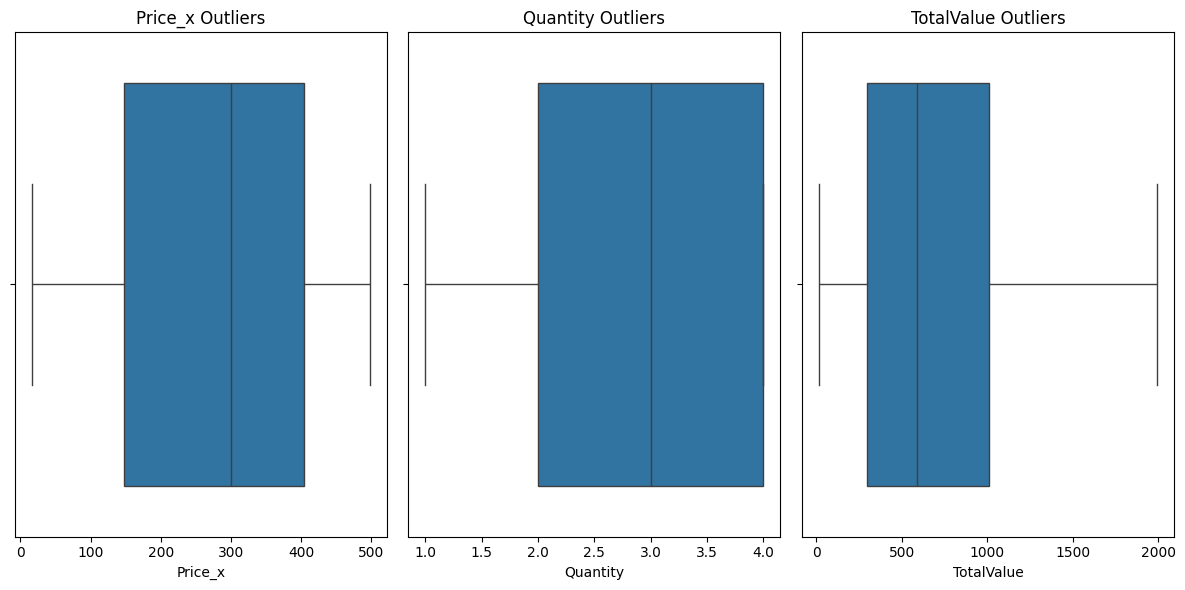

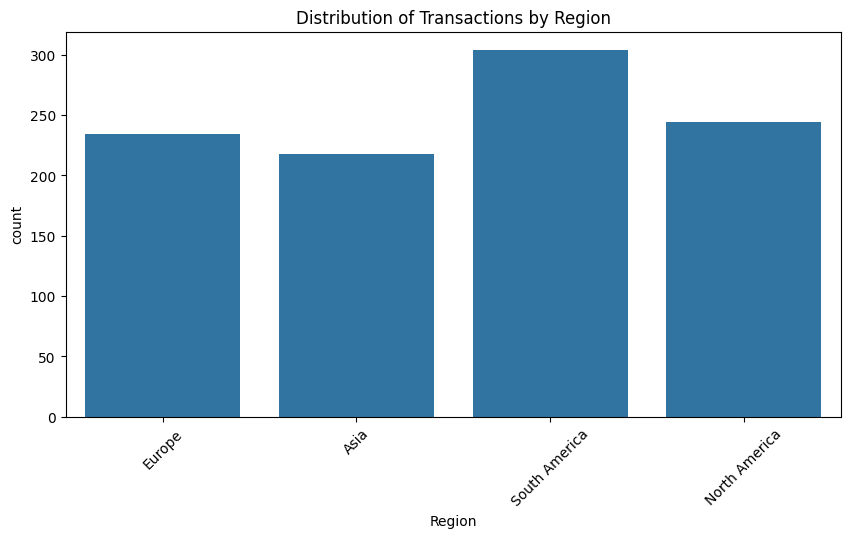

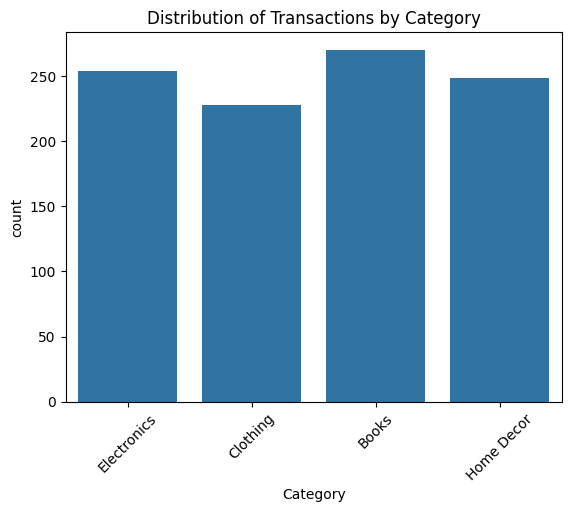

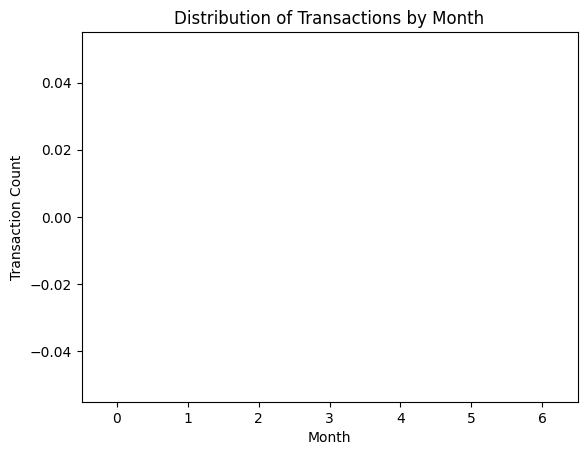

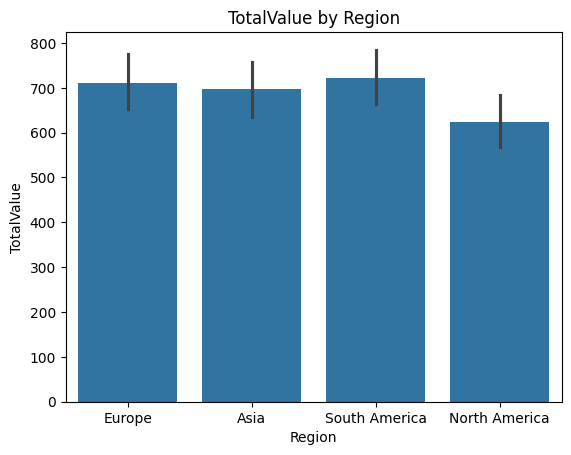

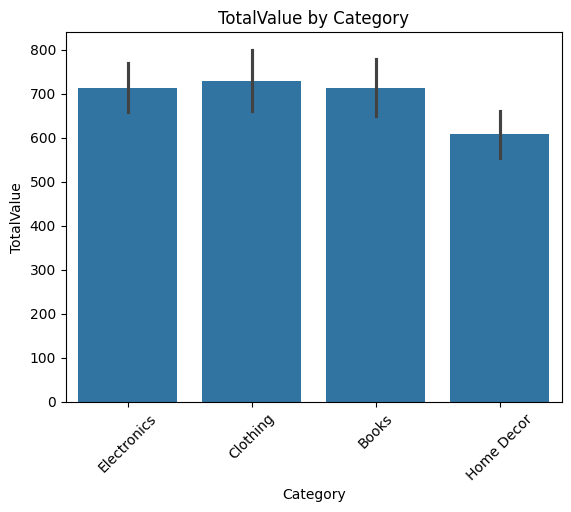

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/drive/My Drive/Zeotap/Customers.csv")
products = pd.read_csv("/content/drive/My Drive/Zeotap/Products.csv")
transactions = pd.read_csv("/content/drive/My Drive/Zeotap/Transactions.csv")

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%d-%m-%Y', errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%d-%m-%Y %H:%M', errors='coerce')

# Merge datasets on relevant columns
data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

# 1. Data Overview
print("Data Info:")
print(data.info())  # Check for missing values and data types
print("\nSummary Statistics:")
print(data.describe())  # Summary statistics for numerical columns

# 2. Univariate Analysis: Plot distributions for numerical features
plt.figure(figsize=(12, 6))

# Distribution of Price_x
plt.subplot(1, 3, 1)
sns.histplot(data['Price_x'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')

# Distribution of Quantity
plt.subplot(1, 3, 2)
sns.histplot(data['Quantity'], kde=True, bins=30, color='green')
plt.title('Quantity Distribution')

# Distribution of TotalValue
plt.subplot(1, 3, 3)
sns.histplot(data['TotalValue'], kde=True, bins=30, color='red')
plt.title('TotalValue Distribution')

plt.tight_layout()
plt.show()

# 3. Bivariate Analysis: Price vs Quantity, TotalValue vs Price, etc.
plt.figure(figsize=(10, 6))

# Scatter plot of Price_x vs TotalValue
sns.scatterplot(x='Price_x', y='TotalValue', data=data)
plt.title('Price_x vs TotalValue')
plt.show()

# Scatter plot of Quantity vs TotalValue
sns.scatterplot(x='Quantity', y='TotalValue', data=data)
plt.title('Quantity vs TotalValue')
plt.show()

# 4. Correlation Heatmap between numerical features
correlation_matrix = data[['Price_x', 'Quantity', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 5. Outlier Detection: Boxplots
plt.figure(figsize=(12, 6))

# Boxplot of Price_x
plt.subplot(1, 3, 1)
sns.boxplot(x=data['Price_x'])
plt.title('Price_x Outliers')

# Boxplot of Quantity
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Quantity'])
plt.title('Quantity Outliers')

# Boxplot of TotalValue
plt.subplot(1, 3, 3)
sns.boxplot(x=data['TotalValue'])
plt.title('TotalValue Outliers')

plt.tight_layout()
plt.show()

# 6. Categorical Features Analysis: Region and Category
plt.figure(figsize=(10, 5))

# Countplot of Regions
sns.countplot(x='Region', data=data)
plt.title('Distribution of Transactions by Region')
plt.xticks(rotation=45)
plt.show()

# Countplot of Categories
sns.countplot(x='Category', data=data)
plt.title('Distribution of Transactions by Category')
plt.xticks(rotation=45)
plt.show()

# 7. Create TransactionMonth column for Peak Months for Transactions
data['TransactionMonth'] = data['TransactionDate'].dt.month

# Peak Months for Transactions
sns.countplot(x='TransactionMonth', data=data)
plt.title('Distribution of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

# 8. Insights on Relationship Between TotalValue and Features
sns.barplot(x='Region', y='TotalValue', data=data)
plt.title('TotalValue by Region')
plt.show()

sns.barplot(x='Category', y='TotalValue', data=data)
plt.title('TotalValue by Category')
plt.xticks(rotation=45)
plt.show()



In [2]:
!jupyter nbconvert "/content/drive/My Drive/Zeotap/S_NITHISHKUMAR_EDA.ipynb" --to pdf

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Zeotap/S_NITHISHKUMAR_EDA.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jup